## Try 8.9.1: Linear model for predicting house prices.

**The Python code below imports the home prices dataset and fits a linear model to predict house price based on square footage.**
 * **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [1]:
# Import packages and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:



# Import and view data
homes = pd.read_csv('homes.csv').dropna()
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [4]:
# Set seed
seed = 123

In [5]:
# Set proportion of data for the test set
test_p = 0.20

# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

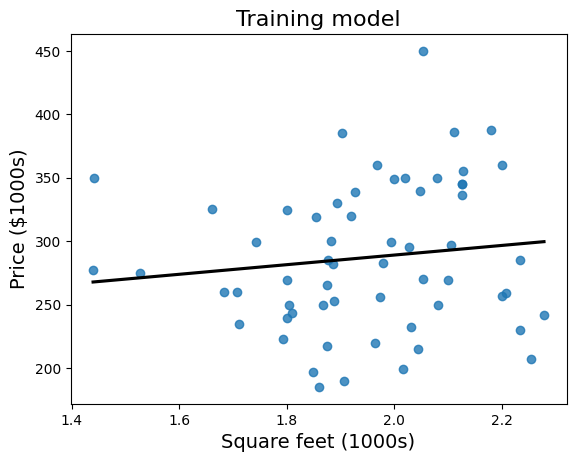

In [6]:
# Plot training dataset and regression line
p = sns.regplot(x=X_train, y=y_train, ci=False, line_kws={'color': 'black'})
p.set_xlabel('Square feet (1000s)', fontsize=14);
p.set_ylabel('Price ($1000s)', fontsize=14);
p.set_title('Training model', fontsize=16);

In [7]:
# Identify homes with high prices
homes[homes["Price"] > 400]

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0


In [8]:
# Initialize and fit the linear model
linearModel = LinearRegression()
linearModel = linearModel.fit(X_train, y_train)

# Print model coefficients
print('beta1 =', linearModel.coef_)
print('beta0 =', linearModel.intercept_)

beta1 = [[37.92605345]]
beta0 = [213.13396131]


In [9]:
# Regression metrics on training dataset
y_pred = linearModel.predict(X_train)
print('MSE =', mean_squared_error(y_train, y_pred))
print('MAE =', mean_absolute_error(y_train, y_pred))
print('R-squared =', r2_score(y_train, y_pred))

MSE = 3224.532078380617
MAE = 47.39109490948372
R-squared = 0.015520917773710008


In [10]:
# Regression metrics on testing dataset
y_pred = linearModel.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

MSE = 4377.548634520407
MAE = 53.02646796077678
R-squared = 0.07881601353080447


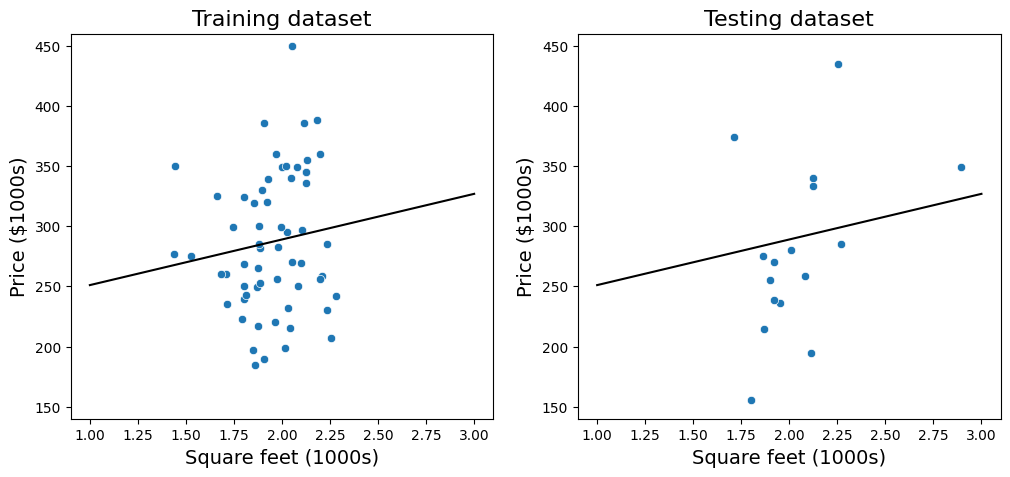

In [11]:
# Plot the model for the training and testing sets
plt.rcParams["figure.figsize"] = (12, 5)

x = pd.array([1, 2, 3])
yhat = 213.13396131 + 37.92605345 * x

plt.subplot(1, 2, 1)

# Training set subplot
p = sns.scatterplot(x=X_train['Floor'], y=y_train['Price'])
plt.plot(x, yhat, color='black')
p.set_xlabel('Square feet (1000s)', fontsize=14)
p.set_ylabel('Price ($1000s)', fontsize=14)
p.set_title('Training dataset', fontsize=16)
p.set_ylim(140, 460)

plt.subplot(1, 2, 2)
# Testing set subplot
p = sns.scatterplot(x=X_test['Floor'], y=y_test['Price'])
plt.plot(x, yhat, color='black')
p.set_xlabel('Square feet (1000s)', fontsize=14);
p.set_ylabel('Price ($1000s)', fontsize=14);
p.set_title('Testing dataset', fontsize=16);
p.set_ylim(140, 460);

## Try 8.9.2: Multiple regression model for predicting house prices.

**The Python code below imports the home prices dataset, and fits a multiple regression model to predict house price based on square footage, number of bedrooms and bathrooms, year built, and garage size.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

### EvaluatingModelPerformance_HomePrices_02

In [12]:
homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [13]:
# Set seed
seed = 123

In [14]:
# Set proportion of data for the test set
test_p = 0.20

# Define input and output features
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

In [15]:
# Initialize and fit the linear model
multipleModel = LinearRegression()
multipleModel = multipleModel.fit(X_train, y_train)

# Print model coefficients
print('betas =', multipleModel.coef_)
print('beta0 =', multipleModel.intercept_)

betas = [[ 17.9502552   16.38901633 -18.91061218  -0.30989983  22.54421546]]
beta0 = [857.30147411]


In [16]:
# Regression metrics on training dataset
pred_training_multiple = multipleModel.predict(X_train)
print('MSE =', mean_squared_error(y_train, pred_training_multiple))
print('MAE =', mean_absolute_error(y_train, pred_training_multiple))
print('R-squared =', r2_score(y_train, pred_training_multiple))

MSE = 2551.419264326467
MAE = 41.57087321107859
R-squared = 0.22102840515698963


In [17]:
# Regression metrics on testing dataset
pred_testing_multiple = multipleModel.predict(X_test)
print('MSE =', mean_squared_error(y_test, pred_testing_multiple))
print('MAE =', mean_absolute_error(y_test, pred_testing_multiple))
print('R-squared =', r2_score(y_test, pred_testing_multiple))

MSE = 4033.191050802188
MAE = 51.55650002967879
R-squared = 0.15128047211818518


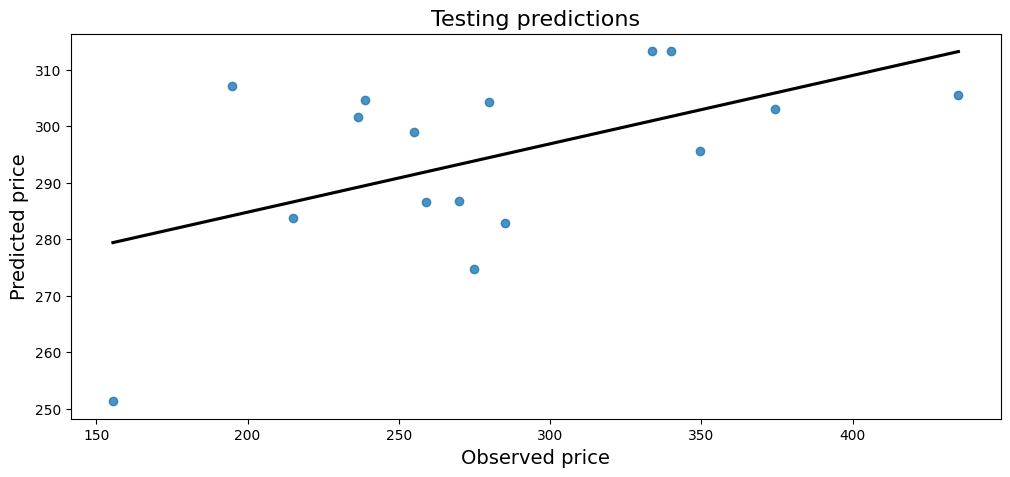

In [18]:
# Plot fitted vs. actual price for testing data
p = sns.regplot(
    x=y_test, y=pred_testing_multiple, ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Observed price', fontsize=14);
p.set_ylabel('Predicted price', fontsize=14);
p.set_title('Testing predictions', fontsize=16);

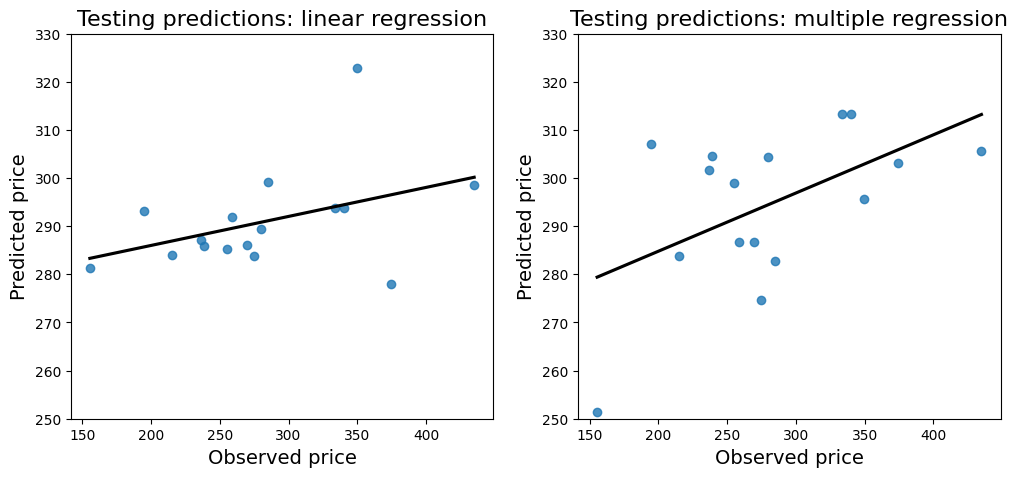

In [19]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 5)

plt.subplot(1, 2, 1)
X_train = X_train[['Floor']]
X_test = X_test[['Floor']]
linearModel = LinearRegression()
linearModel = linearModel.fit(X_train, y_train)
pred_testing_linear = linearModel.predict(X_test)

p = sns.regplot(x=y_test, y=pred_testing_linear, ci=False, line_kws={'color': 'black'})
p.set_xlabel('Observed price', fontsize=14)
p.set_ylabel('Predicted price', fontsize=14)
p.set_title('Testing predictions: linear regression', fontsize=16)
p.set_ylim(250, 330)

plt.subplot(1, 2, 2)
p = sns.regplot(
    x=y_test, y=pred_testing_multiple, ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Observed price', fontsize=14);
p.set_ylabel('Predicted price', fontsize=14);
p.set_title('Testing predictions: multiple regression', fontsize=16);
p.set_ylim(250, 330);

## Try 8.9.3: Comparing regression models for house prices.

**The Python code below imports the home prices dataset and fits two models to predict house prices. The following metrics are calculated for each model: MSE, MAE, R-squared, AIC, and BIC.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [20]:
# Set seed and test proportion
seed = 123
test_p = 0.20

In [21]:
# Linear regression model

# Define input and output features
X = homes[['Floor']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

linearModel = LinearRegression()
linearModel = linearModel.fit(X_train, y_train)

# Metrics for linear regression
y_pred = linearModel.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

MSE = 4377.548634520407
MAE = 53.02646796077678
R-squared = 0.07881601353080447


In [22]:
# statsmodels contains methods for calculating AIC and BIC
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [23]:
# AIC and BIC for linear regression model
X_train = sm.add_constant(X_train)
linearModel = sm.OLS(y_train, X_train).fit()

# Confirm model parameters match
print(linearModel.params)

# Print AIC and BIC
print('AIC = ', linearModel.aic)
print('BIC = ', linearModel.bic)

NameError: name 'sm' is not defined

In [70]:
# Multiple regression model

# Define input and output features
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

multipleModel = LinearRegression()
multipleModel = multipleModel.fit(X_train, y_train)

# Metrics for multiple regression
y_pred = multipleModel.predict(X_test)
print('MSE =', mean_squared_error(y_test, y_pred))
print('MAE =', mean_absolute_error(y_test, y_pred))
print('R-squared =', r2_score(y_test, y_pred))

MSE = 4033.191050802185
MAE = 51.55650002967877
R-squared = 0.15128047211818585


In [72]:
# AIC and BIC for multiple regression model
X_train = sm.add_constant(X_train)
multipleModel = sm.OLS(y_train, X_train).fit()

# Confirm model parameters match
print(multipleModel.params)

# Print AIC and BIC
print('AIC = ', multipleModel.aic)
print('BIC = ', multipleModel.bic)

const    857.301474
Floor     17.950255
Bath      16.389016
Bed      -18.910612
Year      -0.309900
Gar       22.544215
dtype: float64
AIC =  652.9369274386495
BIC =  665.502994811982


## Try 8.9.4: Cross-validation for house prices.

**The Python code below imports the home prices dataset and uses cross-validation to evaluate the linear regression model and multiple regression model.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [89]:
from sklearn.model_selection import train_test_split, cross_val_score

In [91]:
# Import and view dataframe's dimensions
# homes = pd.read_csv('homes.csv').dropna()
homes.shape

(76, 19)

In [93]:
# Cross-validation for linear regression model
X = homes[['Floor']]
y = homes[['Price']]

linearModel = LinearRegression()
linearModel = linearModel.fit(X, y)

# 10-fold cross-validation scores
tenfoldLinear = -cross_val_score(
    linearModel, X, y, scoring='neg_mean_squared_error', cv=10
)

# Leave-one-out cross-validation scores
loocvLinear = -cross_val_score(
    linearModel, X, y, scoring='neg_mean_squared_error', cv=76
)

In [95]:
# Cross-validation for multiple regression model
X = homes[['Floor', 'Bath', 'Bed', 'Year', 'Gar']]
y = homes[['Price']]

multipleModel = LinearRegression()
multipleModel = multipleModel.fit(X, y)

# 10-fold cross-validation scores
tenfoldMultiple = -cross_val_score(
    multipleModel, X, y, scoring='neg_mean_squared_error', cv=10
)

# Leave-one-out cross-validation scores
loocvMultiple = -cross_val_score(
    multipleModel, X, y, scoring='neg_mean_squared_error', cv=76
)

In [87]:
# Combine cross-validation results into a single dataframe
mse = np.concatenate([tenfoldLinear, loocvLinear, tenfoldMultiple, loocvMultiple])
model = np.concatenate([['Linear'] * (10 + 76), ['Multiple'] * (10 + 76)])
cv = np.concatenate(
    [['10-fold'] * 10, ['LOOCV'] * 76, ['10-fold'] * 10, ['LOOCV'] * 76]
)

results = pd.DataFrame({'MSE': mse, 'Model': model, 'CV': cv})

results

,MSE,Model,CV
0,10074.316093,Linear,10-fold
1,2001.671119,Linear,10-fold
2,2294.948987,Linear,10-fold
3,2324.134929,Linear,10-fold
4,2144.582195,Linear,10-fold
...,...,...,...
167,220.358065,Multiple,LOOCV
168,1039.035678,Multiple,LOOCV
169,16531.166077,Multiple,LOOCV
170,270.638666,Multiple,LOOCV


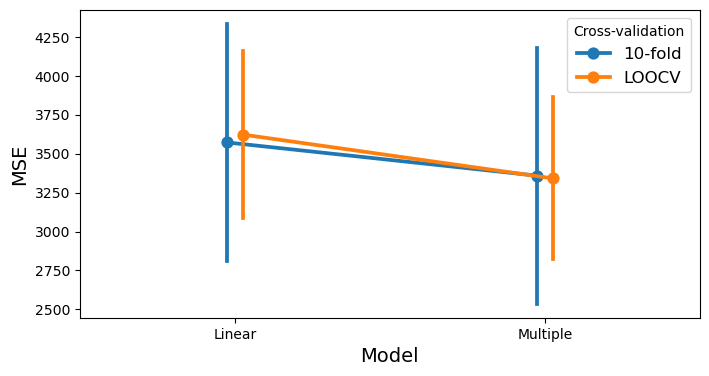

In [61]:
plt.figure(figsize=(8, 4))

# Plot error bars
p = sns.pointplot(data=results, x='Model', y='MSE', hue='CV', dodge=True, errorbar='se')
p.set_xlabel('Model', fontsize=14)
p.set_ylabel('MSE', fontsize=14)
plt.legend(title='Cross-validation', fontsize=12)
plt.show()